In [1]:
import datetime
import pandas as pd

#### 8.1 datetime的时间戳

In [2]:
dt = datetime.datetime(year=2018, month=2, day=27, hour=16, minute=30)
dt

datetime.datetime(2018, 2, 27, 16, 30)

#### 8.2 pandas的时间戳

In [3]:
ts = pd.Timestamp('2018-2-27')
ts

Timestamp('2018-02-27 00:00:00')

单独查看时间戳的月份

In [4]:
ts.month

2

timestamp也可以进行加减操作

In [5]:
ts + pd.Timedelta('3days')

Timestamp('2018-03-02 00:00:00')

#### 8.3 将字符串转化为timestamp格式

可以看到，此时还是字符串格式

In [6]:
s = pd.Series(['2018-02-27 00:00:00', '2018-02-28 00:00:00','2018-03-01 00:00:00'])
s

0    2018-02-27 00:00:00
1    2018-02-28 00:00:00
2    2018-03-01 00:00:00
dtype: object

转化成datetime格式

In [7]:
ts = pd.to_datetime(s)
ts

0   2018-02-27
1   2018-02-28
2   2018-03-01
dtype: datetime64[ns]

查看小时

In [8]:
ts.dt.hour

0    0
1    0
2    0
dtype: int64

查看星期

In [9]:
ts.dt.weekday

0    1
1    2
2    3
dtype: int64

#### 8.4 构造时间序列

按间隔(freq)从start日期开始，构造periods个时间序列

In [10]:
pd.Series(pd.date_range(start='2017-11-24', periods=10, freq='12h'))

0   2017-11-24 00:00:00
1   2017-11-24 12:00:00
2   2017-11-25 00:00:00
3   2017-11-25 12:00:00
4   2017-11-26 00:00:00
5   2017-11-26 12:00:00
6   2017-11-27 00:00:00
7   2017-11-27 12:00:00
8   2017-11-28 00:00:00
9   2017-11-28 12:00:00
dtype: datetime64[ns]

#### 8.5 分析水流数据

In [11]:
df = pd.read_csv('./data/flowdata.csv')
df.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


修改为时间序列

In [12]:
df['Time'] = pd.to_datetime(df['Time'])

把时间序列作为索引

In [13]:
df = df.set_index('Time')

In [14]:
df.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [15]:
df.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

#### 8.6 用Timestamp作时间切片

In [16]:
df[pd.Timestamp('2012-01-01 09:00'): pd.Timestamp('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


也可以用string切片

In [18]:
df[('2012-01-01 09:00'):('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


#### 8.7 取出某年的数据

In [19]:
df['2013']

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


#### 8.8 用bool类型进行时间序列的判断

查找所有2月数据

In [20]:
df[df.index.month == 2].head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-02-01 00:00:00,0.204667,0.158250,0.022583
2009-02-01 03:00:00,0.200500,0.153667,0.021833
2009-02-01 06:00:00,0.198583,0.151750,0.021917
2009-02-01 09:00:00,0.210583,0.164833,0.022750
2009-02-01 12:00:00,0.200500,0.153833,0.024333


查找所有 8~12点间的数据

In [21]:
df[(df.index.hour>8) & (df.index.hour<12)].head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-05 09:00:00,0.161500,0.114583,0.021583


另一种方式查找所有 8~12点间的数据

In [22]:
df.between_time('08:00','12:00').head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-02 12:00:00,0.147833,0.101917,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833


#### 8.9 重采样

按天的方式来进行重采样，并计算均值

In [23]:
df.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


按月重采样并画图

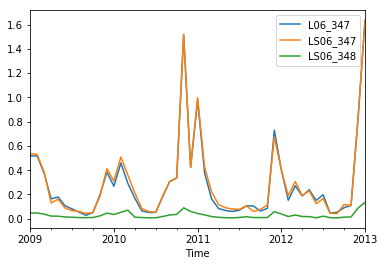

In [24]:
%matplotlib inline
df.resample('M').mean().plot()